In [2]:
%load_ext autoreload
%autoreload 2
from radis import calc_spectrum
from radis import load_spec
from radis.test.utils import getTestFile
from radis import Spectrum
import matplotlib.pyplot as plt
import numpy as np
import pickle

MOLECULES_LIST = ['H2_p', 'H2', 'SiH', 'H2CO', 'NO2', 'SiO2', 'OH_p', 'LiH', 'CaF', 'SiS', 'CH3Br', 'PF3', 'NO+', 'SiH4', 'C2N2', 'HeH_p', 'SiN', 'H2S', 'BeH', 'GeH4', 'HF', 'NO', 'HCl', 'NH', 'SiH2', 'NiH', 'HC3N', 'CH', 'N2', 'AlF', 'AsH3', 'SH', 'CO2', 'C2H6', 'HCOOH', 'O', 'AlH', 'ClONO2', 'N2O', 'TiH', 'COF2', 'CaH', 'LiF', 'NF3', 'HCN', 'H2O', 'MgH', 'ClO', 'CS2', 'CH4', 'CaOH', 'KF', 'O3', 'O2', 'FeH', 'AlO', 'NaOH', 'C2', 'CH3CN', 'H3_p', 'CP', 'NaO', 'ScH', 'COCl2', 'C2H4', 'MgF', 'cis-P2H2', 'SiO', 'NaH', 'CH3', 'PN', 'CS', 'CaO', 'CrH', 'KCl', 'HOCl', 'CH3Cl', 'HNO3', 'HI', 'CF4', 'NaF', 'LiCl', 'PO', 'NH3', 'H2O2', 'VO', 'CH3OH', 'NS', 'HOBr', 'TiO', 'PS', 'HO2', 'CO', 'H3O_p', 'YO', 'KOH', 'SO3', 'PH', 'trans-P2H2', 'SO', 'CN', 'C4H2', 'HBr', 'LaO', 'CH3I', 'OCS', 'SO2', 'PH3', 'AlCl', 'MgO', 'CH3F', 'NaCl', 'SF6', 'LiH_p', 'OH', 'C2H2']
hitemp = ['H2O', 'CO2', 'N2O', 'CO', 'CH4', 'NO', 'NO2', 'OH']
also = ['C2H2', 'C2H4', 'C2H6', 'C2N2', 'C4H2', 'CF4', 'CH3Br', 'CH3CN', 'CH3Cl', 'CH3F', 'CH3I', 'CH3OH', 'CH4', 'CO', 'CO2', 'COCl2', 'COF2', 'CS', 'CS2', 'ClO', 'ClONO2', 'GeH4', 'H2', 'H2CO', 'H2O', 'H2O2', 'H2S', 'HBr', 'HC3N', 'HCN', 'HCOOH', 'HCl', 'HF', 'HI', 'HNO3', 'HO2', 'HOBr', 'HOCl', 'N2', 'N2O', 'NF3', 'NH3', 'NO', 'NO+', 'NO2', 'O', 'O2', 'O3', 'OCS', 'OH', 'PH3', 'SF6', 'SO', 'SO2', 'SO3']
geisa = ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2', 'NO', 'SO2', 'NO2', 'NH3', 'PH3', 'HNO3', 'OH', 'HF', 'HCL', 'HBR', 'HI', 'CLO', 'OCS', 'H2CO', 'C2H6', 'CH3D', 'C2H2', 'C2H4', 'GEH4', 'HCN', 'C3H8', 'C2N2', 'C4H2', 'HC3N', 'HOCL', 'N2', 'CH3CL', 'H2O2', 'H2S', 'HCOOH', 'COF2', 'SF6', 'C3H4', 'HO2', 'CLONO2', 'CH3BR', 'CH3OH', 'NO+', 'HNC', 'C6H6', 'C2HD', 'CF4', 'CH3CN', 'HDO', 'SO3', 'HONO', 'COFCL', 'CH3I', 'CH3F', 'RUO4', 'H2C3H2']
exomol = ['AlCl', 'AlF', 'AlH', 'AlO', 'AsH3', 'BeH', 'C2', 'C2H2', 'C2H4', 'CH', 'CH3', 'CH3Cl', 'CH3F', 'CH4', 'CN', 'CO', 'CO2', 'CP', 'CS', 'CaF', 'CaH', 'CaO', 'CaOH', 'CrH', 'FeH', 'H2', 'H2CO', 'H2CS', 'H2O', 'H2O2', 'H2S', 'H2_p', 'H3O_p', 'H3_p', 'HCN', 'HCl', 'HF', 'HNO3', 'HeH_p', 'KCl', 'KF', 'KOH', 'LaO', 'LiCl', 'LiF', 'LiH', 'LiH_p', 'MgF', 'MgH', 'MgO', 'N2', 'N2O', 'NH', 'NH3', 'NO', 'NS', 'NaCl', 'NaF', 'NaH', 'NaO', 'NaOH', 'NiH', 'O2', 'OCS', 'OH', 'OH_p', 'PF3', 'PH', 'PH3', 'PN', 'PO', 'PS', 'SH', 'SO2', 'SO3', 'ScH', 'SiH', 'SiH2', 'SiH4', 'SiN', 'SiO', 'SiO2', 'SiS', 'TiH', 'TiO', 'VO', 'YO', 'cis-P2H2', 'trans-P2H2']

# Unsuccessful: SiO2, LiH, PF3, NO+, SiH4, C2N2, SiN, GeH4, NiH, HC3N, N2, AsH3, O, ClONO2, NF3, MgH, CS2, CaOH
# For future Luke: from MOLECULES_LIST, I got up to CH4 and stopped. But I did do C2H4, CO, SO2, CH3OH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
with open('compounds' + name + '.pickle', 'rb') as handle:
    Compounds = pickle.load(handle)

In [38]:
name = 'O2'
bank = 'hitran'

In [35]:
Cal_conc = np.logspace(-4,0,250)

Absorbance = []

for conc in Cal_conc:
    s = calc_spectrum(950, 1070,         # cm-1
                      molecule=name,
                      isotope='1',
                      pressure=1.01325,   # bar
                      Tgas=173+273,           # K
                      mole_fraction=conc,
                      path_length=500,      # cm
                      databank=bank,  # or 'hitemp', 'geisa', 'exomol'
                      )
    s.apply_slit(0.241, 'cm-1', shape="gaussian")       # simulate an experimental slit
    
    w, A = s.get('absorbance', wunit='cm-1')
    
    Absorbance.append(A)
    
    #s.plot('absorbance')

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0001
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      

----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.00012484913627071773
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      0 cm-1
   optimization         simple

   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      0 cm-1
   optimization         simple
   parfuncfmt           hapi
   parsum_mode          full summation
   pseudo_continuum_threshold  0
   sparse_ldm           auto
   truncation           50 cm-1
   waveunit             cm-1
   wstep                0.01 cm-1
   zero_padding         -1
----------------------------------------
0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.00016174666742233376
   molecule  

   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      0 cm-1
   optimization         simple
   parfuncfmt           hapi
   parsum_mode          full summation
   pseudo_continuum_threshold  0
   sparse_ldm           auto
   truncation           50 cm-1
   waveunit             cm-1
   wstep                0.01 cm-1
   zero_padding         -1
----------------------------------------
0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.00020193931722345407
   molecule  

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.00026161984422231043
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_m

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0003266301158243521
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.00040779487840674855
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_m

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0005091283834470491
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0006356423892427087
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0007935940327400753
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0009907952953719418
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0012369993684827759
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0015443830272249786
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0019281488702019513
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.0024979880787725562
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_ma

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.003118716540493036
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.003893690663537564
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.004861239162480226
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.006069215106410441
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.007577362638765357
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.009460271806598614
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.011811067639400605
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.014746015932141905
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.018410273525621593
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.022985067481815172
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.028696658222287882
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_map

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.03582752992908632
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.04473036166359716
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.05584547018776936
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.06972258717575121
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.08704804787452358
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.10867873591186356
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.1356844630958961
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mappi

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.16940088022878705
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.09s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.21149553580063365
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapp

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.2640503496982177
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mappi

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.32966458091803486
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbou

----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      0 cm-1
   optimization         simple
   parfuncfmt           hapi
   parsum_mode          full summation
   pseudo_continuum_threshold  0
   sparse_ldm           auto
   truncation           50 cm-1
   waveunit             cm-1
   wstep                0.01 cm-1
   zero_padding         -1
----------------------------------------
0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction   

0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.5332214733067242
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mappi

   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines      0 cm-1
   optimization         simple
   parfuncfmt           hapi
   parsum_mode          full summation
   pseudo_continuum_threshold  0
   sparse_ldm           auto
   truncation           50 cm-1
   waveunit             cm-1
   wstep                0.01 cm-1
   zero_padding         -1
----------------------------------------
0.08s - Spectrum calculated
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Tr

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 446 K
   Trot                 446 K
   Tvib                 446 K
   isotope              1
   mole_fraction        0.8624679630538953
   molecule             O3
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1070.0000 cm-1
   wavenum_min          950.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\Luke\.radisdb\hitran\O3.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour

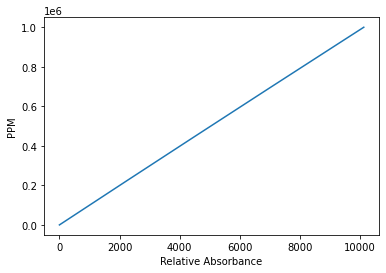

In [36]:
mu = []

for a in Absorbance:
    mu.append(np.nanmean(a/Absorbance[0]))
    
plt.ylabel('PPM')
plt.xlabel('Relative Absorbance')


ppm = [x * 1000000 for x in Cal_conc][:len(mu)]

plt.plot(mu, ppm)

In [37]:
#Compounds = {}
Compounds[name] = {}
Compounds[name]['bounds'] = [[950, 1070],[2000, 2140]]
Compounds[name]['PPM_RelativeAbsorbance'] = [ppm, mu]
Compounds[name]['Source'] = bank

with open('compounds' + name + '.pickle', 'wb') as handle:
    pickle.dump(Compounds, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [108]:
Compounds.keys()

dict_keys(['C2H2', 'H2CO', 'NO2', 'SiH', 'CaF', 'SiS', 'CH3Br', 'CO', 'H2S', 'BeH', 'HF', 'NO', 'HCl', 'NH', 'SiH2', 'AlF', 'SH', 'CH', 'CO2', 'C2H6', 'HCOOH', 'AlH', 'N2O', 'TiH', 'COF2', 'CaH', 'LiF', 'HCN', 'H2O', 'MgH', 'ClO', 'CH4', 'C2H4', 'SO2', 'CH3OH'])

In [39]:
s = calc_spectrum(800, 8040,         # cm-1
                      molecule=name,
                      isotope='1',
                      pressure=1.01325,   # bar
                      Tgas=173+273,           # K
                      mole_fraction=0.01,
                      path_length=500,      # cm
                      databank=bank,  # 'hitran' 'hitemp', 'geisa', 'exomol'
                      )

w, A = s.get('absorbance', wunit='cm-1')
plt.plot(w,A)

Using C:\Users\Luke\.radisdb\hitran\downloads__can_be_deleted\O2


Data is fetched from http://hitran.org



Exception: Cannot connect to http://hitran.org. Try again or edit GLOBAL_HOST variable.

In [7]:
def getReferenceMatrix(Compounds, T, P, W_obs):
    
    output = []
    
    for c in Compounds:
        
        bank = Compounds[c]['Source']
        
        tmp = np.zeros_like(W_obs)
        
        for i in range(len(Compounds[c]['bounds'])):
            bound = Compounds[c]['bounds'][i]
            try:
                s = calc_spectrum(bound[0], bound[1],         # cm-1
                          molecule=c,
                          isotope='1',
                          pressure=P,   # bar
                          Tgas=T,           # K
                          mole_fraction=10**(-4),
                          path_length=500,      # cm
                          databank=bank,  # or 'hitemp', 'geisa', 'exomol'
                          )
            except:
                print("BAD", c)
            s.apply_slit(0.241, 'cm-1', shape="gaussian")       # simulate an experimental slit
            s.resample(W_obs) # resample to fit observations (of del k ~ 0.241 cm^{-1})
                
            w, A = s.get('absorbance', wunit='cm-1')
            
            iloc, jloc = np.argmin(np.abs(w.min() - W_obs)), np.argmin(np.abs(w.max() - W_obs))
            
            tmp[iloc:jloc] = A[:-1]
            
        output.append(tmp)
    
    ref_mat = np.array(output)
    
    return ref_mat

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

Error: Couldn't download .broad file at http://www.exomol.com/db/SiH/28Si-1H/28Si-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH/28Si-1H/28Si-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH\28Si-1H\SiGHTLY\28Si-1H__SiGHTLY.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             SiH
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4000.0000 cm-1
   wavenum_min          3600.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
  

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 40Ca-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CaF\40Ca-19F\MoLLIST\40Ca-19F__MoLLIST.trans.bz2
.broad is used.


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: LinestrengthCutoffWarning: Estimated error after discarding lines is large: 0.26%. Consider reducing cutoff
  warnings.warn(WarningType(message))
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CaF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2320.0000 cm-1
   wavenum_min          2175.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             exomol-radisdb
   dbpath               C:\Users\luker\.radisdb\exomol\CaF\40Ca-19F\MoLLIST
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
 

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CH3Br
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1100.0000 cm-1
   wavenum_min          825.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\CH3Br.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines

0.34s - Spectrum calculated
90001 90002
237504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             H2S
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4150.0000 cm-1
   wavenum_min          3500.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\H2S.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   me

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


55001 55002
162504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4400.0000 cm-1
   wavenum_min          3400.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\HF.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   n

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.022 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0072 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.29s - Spectrum calculated
100001 100002
377504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             NO
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2000.0000 cm-1
   wavenum_min          1700.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\NO.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   me

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.02 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0066 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.27s - Spectrum calculated
62001 62002
249504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HCl
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          5900.0000 cm-1
   wavenum_min          5200.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\HCl.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   me

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.025 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0083 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


70001 70002
527504
Using ExoMol database MoLLIST for 14N-1H
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\NH\14N-1H\MoLLIST\14N-1H__MoLLIST.trans.bz2


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             NH
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          3450.0000 cm-1
   wavenum_min          2800.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             exomol-radisdb
   dbpath               C:\Users\luker\.radisdb\exomol\NH\14N-1H\MoLLIST
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_en

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


1.47s - Spectrum calculated
50000 50001
67503
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__01000-02000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__02000-03000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


1.92s - Spectrum calculated
40001 40002
157504
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__02000-03000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__03000-04000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
---------------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


2.30s - Spectrum calculated
50001 50002
262504
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__03000-04000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__04000-05000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
---------------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


2.68s - Spectrum calculated
50001 50002
357504
Using ExoMol database MoLLIST for 27Al-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__air.broad and save.


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Reading C:\Users\luker\.radisdb\exomol\AlF\27Al-19F\MoLLIST\27Al-19F__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             AlF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          850.0000 cm-1
   wavenum_min          700.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             exomol-radisdb
   dbpath               C:\Users\luker\.radisdb\exomol\AlF\27Al-19F\MoLLIST
   diluent              

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


40001 40002
217504
Using ExoMol database GYT for 32S-1H (recommended by the ExoMol team). All available databases are ['xsec-GYT', 'SNaSH-SH', 'GYT']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SH\32S-1H\GYT\32S-1H__GYT.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fracti

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 12C-1H (recommended by the ExoMol team). All available databases are ['Villanueva', 'MoLLIST']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CH\12C-1H\MoLLIST\12C-1H__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CO2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2400.0000 cm-1
   wavenum_min          2260.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\CO2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines   

10500 10501
120003
Using ExoMol database AlHambra for 27Al-1H (recommended by the ExoMol team). All available databases are ['xsec-AlHambra', 'AlHambra']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\AlH\27Al-1H\AlHambra\27Al-1H__AlHambra.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope    

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


45000 45001
117503
Using ExoMol database AlHambra for 27Al-1H (recommended by the ExoMol team). All available databases are ['xsec-AlHambra', 'AlHambra']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\AlH\27Al-1H\AlHambra\27Al-1H__AlHambra.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope    

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             N2O
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1350.0000 cm-1
   wavenum_min          1100.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\N2O.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines   

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             COF2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1280.0000 cm-1
   wavenum_min          1200.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\COF2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines 

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database XAB for 40Ca-1H (recommended by the ExoMol team). All available databases are ['MoLLIST-CaH', 'Yadin', 'UGAMOP', 'xsec-XAB', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CaH\40Ca-1H\XAB\40Ca-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 7Li-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\LiF\7Li-19F\MoLLIST\7Li-19F__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             LiF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: LinestrengthCutoffWarning: Estimated error after discarding lines is large: 100.00%. Consider reducing cutoff
  warnings.warn(WarningType(message))


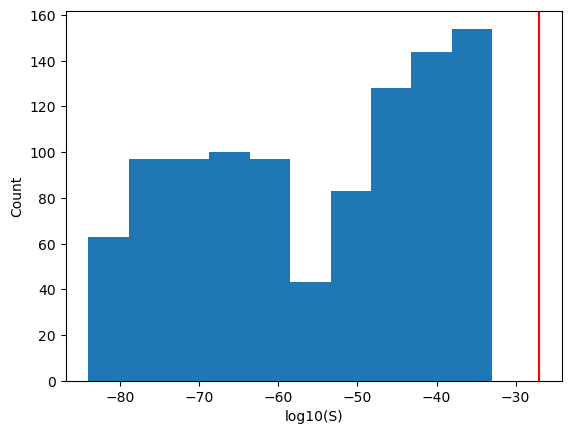

BAD LiF
27001 27002
194504
Using ExoMol database MoLLIST for 7Li-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\LiF\7Li-19F\MoLLIST\7Li-19F__MoLLIST.trans.bz2
.broad is used.
BAD LiF
27001 27002
194504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HCN
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   v

10.31s - Spectrum calculated
100000 100001
697503
Using ExoMol database XAB for 24Mg-1H (recommended by the ExoMol team). All available databases are ['Yadin', 'UGAMOP', 'xsec-XAB', 'MoLLIST-MgH', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\MgH\24Mg-1H\XAB\24Mg-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   T

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.18s - Spectrum calculated
42000 42001
97503
Using ExoMol database XAB for 24Mg-1H (recommended by the ExoMol team). All available databases are ['Yadin', 'UGAMOP', 'xsec-XAB', 'MoLLIST-MgH', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\MgH\24Mg-1H\XAB\24Mg-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib 

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.12s - Spectrum calculated
30001 30002
227504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             ClO
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          880.0000 cm-1
   wavenum_min          800.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\ClO.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memo

31001 31002
260504
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             SO2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1400.0000 cm-1
   wavenum_min          1070.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\SO2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
  

In [8]:
R = getReferenceMatrix(Compounds, 300, 1.01)

In [14]:
mini = 800
maxi = 6000

for c in Compounds:
    for b in Compounds[c]['bounds']:
        if b[0] < mini:
            mini = b[0]
        if b[1] > maxi:
            maxi = b[1]
            
W = np.arange(mini, maxi+0.01, 0.01)
W = [round(x,2) for x in W]

In [154]:
tmp = np.zeros_like(W)

iloc = np.argmin(np.abs(w.min() - W))
jloc = np.argmin(np.abs(w.max() - W))
tmp[iloc:jloc+1] = A

output.append(tmp)

In [163]:
Compounds[]

NameError: name 'output' is not defined

In [6]:
Compounds['AlH']['Source']

'exomol'

In [16]:
s = calc_spectrum(1000, 5000,         # cm-1
                          wstep = 0.01,
                          molecule='LiF',
                          isotope='1',
                          pressure=1.01,   # bar
                          Tgas=300,           # K
                          mole_fraction=10**(-4),
                          path_length=500,      # cm
                          databank='exomol',  # or 'hitemp', 'geisa', 'exomol'
                          )

Using ExoMol database MoLLIST for 7Li-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\LiF\7Li-19F\MoLLIST\7Li-19F__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             LiF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


400001 400001


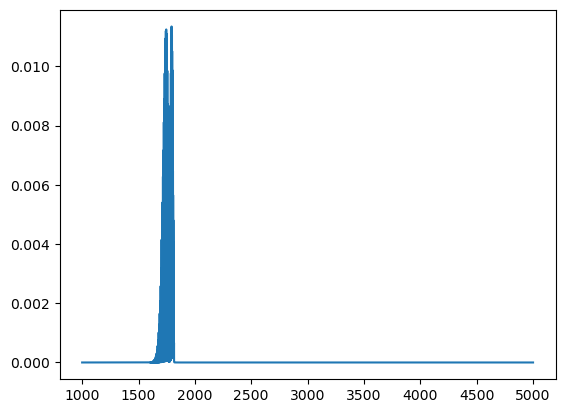

In [23]:
s.apply_slit(0.241, 'cm-1', shape="gaussian")       # simulate an experimental slit
                
w, A = s.get('absorbance', wunit='cm-1')

plt.plot(w,A)
print(len(w),len(A))

Text(-100000.0, 1, '−100000')


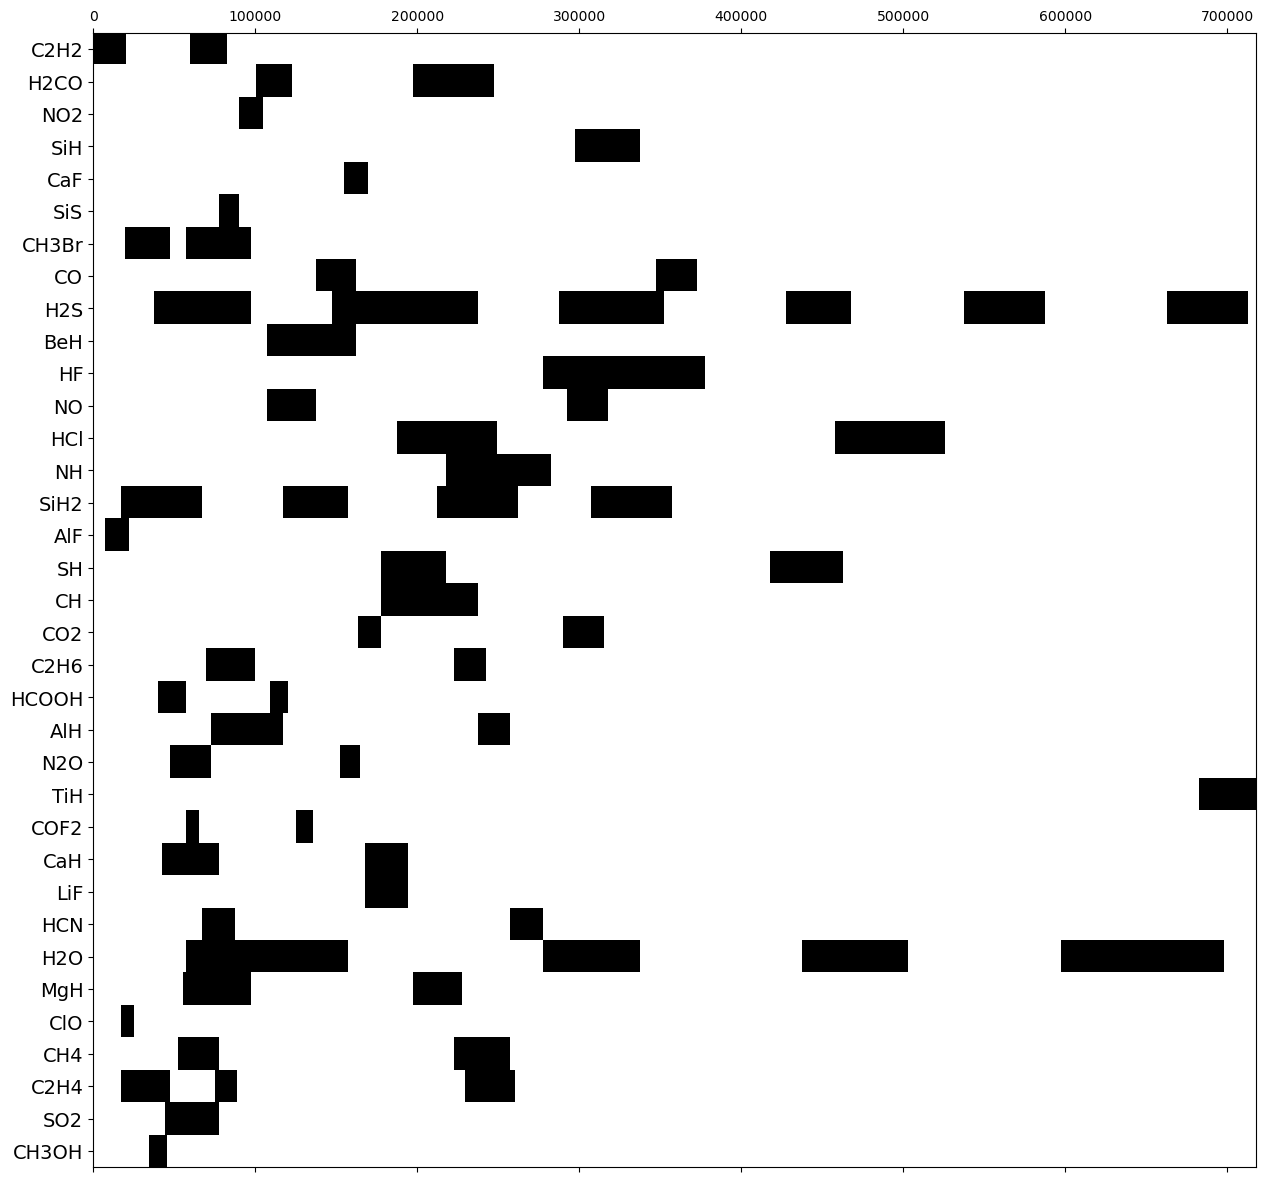

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
ax.spy(R, aspect = 1/0.00005)
ax.set_yticks(np.arange(0,len(Compounds.keys()),1))
ax.set_yticklabels(Compounds.keys(), fontsize=14)
print(ax.get_xticklabels()[0])
plt.show()

In [14]:
len(Compounds.keys())

35